<h1><b>Importing the necessary Libraries</b></h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

<h1><b>Exploring the Data</b></h1>

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

In [5]:
df.shape

(301, 9)

In [6]:
X = df[['Car_Name', 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
y = df[['Selling_Price']]

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

<h1><b>Encoding Categorical Variables</b></h1>

<p>here i first checked if the same categories found in the train set are in the test set to avoid errors while testing the model</p>

In [10]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['Fuel_Type', 'Selling_type', 'Transmission']

Categorical columns that will be dropped from the dataset: ['Car_Name']


In [11]:
from sklearn.preprocessing import OrdinalEncoder


label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

In [12]:
print(label_X_train.shape)
print(label_X_valid.shape)

(240, 7)
(61, 7)


<h1><b>Fitting the Dataset with two models : Linear Regression and Decision Tree </b></h1>

In [13]:
linreg = LinearRegression()
linreg.fit(label_X_train,y_train)
y_pred_lin = linreg.predict(label_X_valid)

In [14]:
print (metrics.mean_absolute_error(y_valid,y_pred_lin))

1.000153282352626


<h1><b>Tuning the max_leaf_node parameter in the Decision Tree to see the MAE results</b></h1>

In [15]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = metrics.mean_absolute_error(val_y, preds_val)
    return(mae)

In [16]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
arr = []

for c in candidate_max_leaf_nodes :
    mae = get_mae(c,label_X_train, label_X_valid, y_train, y_valid)
    print("the mae for " + str(c) + " is : " + str(mae))
    arr.append([c,mae])

print(arr)

best_tree_size = min(arr, key=lambda x: x[1])[0]
print("the best tree size is : " + str(best_tree_size))


the mae for 5 is : 1.6149702295559505
the mae for 25 is : 0.6848462705758134
the mae for 50 is : 0.7408738762559494
the mae for 100 is : 0.6957883317261329
the mae for 250 is : 0.7095081967213114
the mae for 500 is : 0.7095081967213114
[[5, 1.6149702295559505], [25, 0.6848462705758134], [50, 0.7408738762559494], [100, 0.6957883317261329], [250, 0.7095081967213114], [500, 0.7095081967213114]]
the best tree size is : 25


<h1><b>plotting the different MAE's for different max_leaf_nodes</b></h1>

In [17]:
results = {}
for i in candidate_max_leaf_nodes:
    results[i] = get_mae(i,label_X_train, label_X_valid, y_train, y_valid)

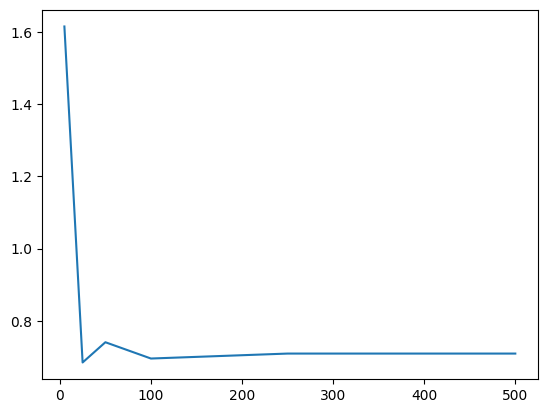

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()